In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def inter(x,a,b):
    if a<=x<=b:
        return True
def Y(X):
    y = []
    for i in range(X.shape[0]):
        if (inter(X[i][0],-1,-.5) or inter(X[i][0],0,.5)) and (inter(X[i][1],-1,-.5) or inter(X[i][1],0,.5)):
            y.append(1)
        elif  (inter(X[i][0],-.5,0) or inter(X[i][0],.5,1)) and (inter(X[i][1],-.5,0) or inter(X[i][1],.5,1)):
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)    

In [3]:
def echan(N:int):
    X = np.random.uniform(-1,1, (N,2))
    y = Y(X)
    return X,y

In [4]:
N = 5
echan(N)

(array([[ 0.23141924,  0.30061034],
        [ 0.70825011,  0.23131859],
        [-0.10407156,  0.73751199],
        [ 0.88701048,  0.50678156],
        [ 0.00173167,  0.47239731]]),
 array([ 1, -1,  1,  1,  1]))

In [5]:
X_train,y_train = echan(N = 300)
X_test,y_test = echan(N = 1000)

In [25]:
def phi(X, deg:int):
    phi_x = []
    for i in range(1,deg+1):
        for j in range(1,deg+1):
            if i+j <=  deg:
                phi_x.append(X[0]**i * X[1]**j)
    return phi_x

In [6]:
def phi_2(x, d):
    
    phi_x = np.array([1])
    
    
    for i in range(d+1):
        for j in range(d+1):
            
            if i + j > d:
                continue
            
            phi_x = np.append(phi_x, x[0]**i * x[1]**j)
            
    return phi_x


In [7]:
def fit_transform(X,y,deg:int):
    X_transform  = np.array([phi_2(_,deg) for _ in X])
    return X_transform, y

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
deg = 3
model = SVC(C= 10, kernel = "linear")
X,y = fit_transform(X_train,y_train,deg)
model.fit(X,y)
y_pred = model.predict(X)
# model.score(X,y)
hinge_loss(y,y_pred)

0.8866666666666667

In [39]:
def plot_data(X_train,y_train, X_test,y_test):
    fig, ax = plt.subplots(figsize = (8,8))
    for i, label in enumerate(y_train):
        if label == 1:
            ax.scatter(X_train[i][0],X_train[i][1], c = 'b', marker = 'o')
        else :
            ax.scatter(X_train[i][0],X_train[i][1], c= 'b', marker = 'x')
    
    for i,label in enumerate(y_test):
        if label == 1:
            ax.scatter(X_test[i][0],X_test[i][1], c = 'r', marker = 'o')
        else :
            ax.scatter(X_test[i][0],X_test[i][1], c= 'b', marker = 'x')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    plt.show()   

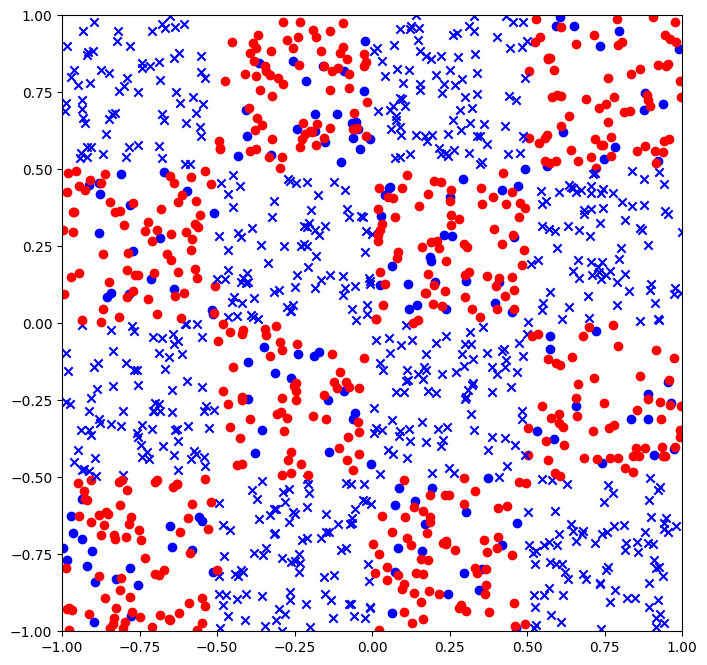

In [40]:
plot_data(X_train,y_train,X_test,y_test)

In [26]:
def loss(X,y,model):
    loss = []
    for x,label in zip(X,y):
        # Modify this line to pass x as a 2D array
        prediction = model.predict([x])[0]
        loss.append(max(0,1-label*prediction))
    return np.array(loss)
    
def plot_loss(deg,c):
    clf = SVC(C=c, kernel = "linear")
    X,y = fit_transform(X_train,y_train,deg)
    clf.fit(X,y)
    loss_train = loss(X,y,clf)
    print(loss_train)
    print("---",loss_train.sum()/loss_train.shape[0])
    X2,y2 = fit_transform(X_test,y_test,deg)
    loss_test = loss(X2,y2,clf)
    print("------", loss_test.sum()/loss_test.shape[0])
    fig,ax = plt.subplots(figsize = (4,4))
    ax.plot(loss_train, label = "erreur apprentissage", c = 'b')
    ax.plot(loss_test, label = "erreur en test", c = 'r')
    ax.set_xlim([0,20])
    ax.set_ylim([0,5])
    plt.legend(loc = 'best')
    plt.show()
    


[0 0 2 2 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2
 0 0 0 2 2 2 0 0 0 2 2 0 2 0 2 0 0 2 2 0 0 2 0 2 2 0 0 2 0 0 2 2 0 2 2 0 2
 0 2 0 0 2 0 0 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 2 0 0 2 2 2 0 2 0 2 0 2 2 2 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 2 2 0 0 2 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2
 2 2 0 0 2 0 2 2 0 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2 0 0 0 2 0 2
 0 2 2 0 0 2 0 2 0 2 2 0 2 0 0 0 2 0 2 2 0 2 0 2 0 0 2 2 2 0 0 2 2 2 2 0 2
 0 2 2 0 2 2 0 2 2 0 0 0 2 2 0 2 0 2 0 0 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 2 0
 2 0 0 2 0 0 0 2 2 2 0 0 0 0 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 2]
--- 0.8866666666666667
------ 0.926


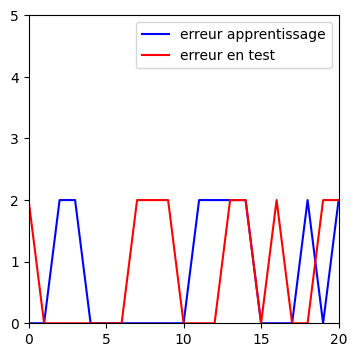

In [27]:
c = 10
deg = 3
plot_loss(deg,c)

In [59]:
deg =4
X_new = np.random.uniform(-1,1,(10,2)) 

# Transform the new data using the phi function
X_new_transformed = np.array([phi(_, deg) for _ in X_new])

# Make predictions on the new data using the trained model
# predictions = model.predict(X_new_transformed)

# print(predictions)
X_new_transformed.shape

(10, 6)